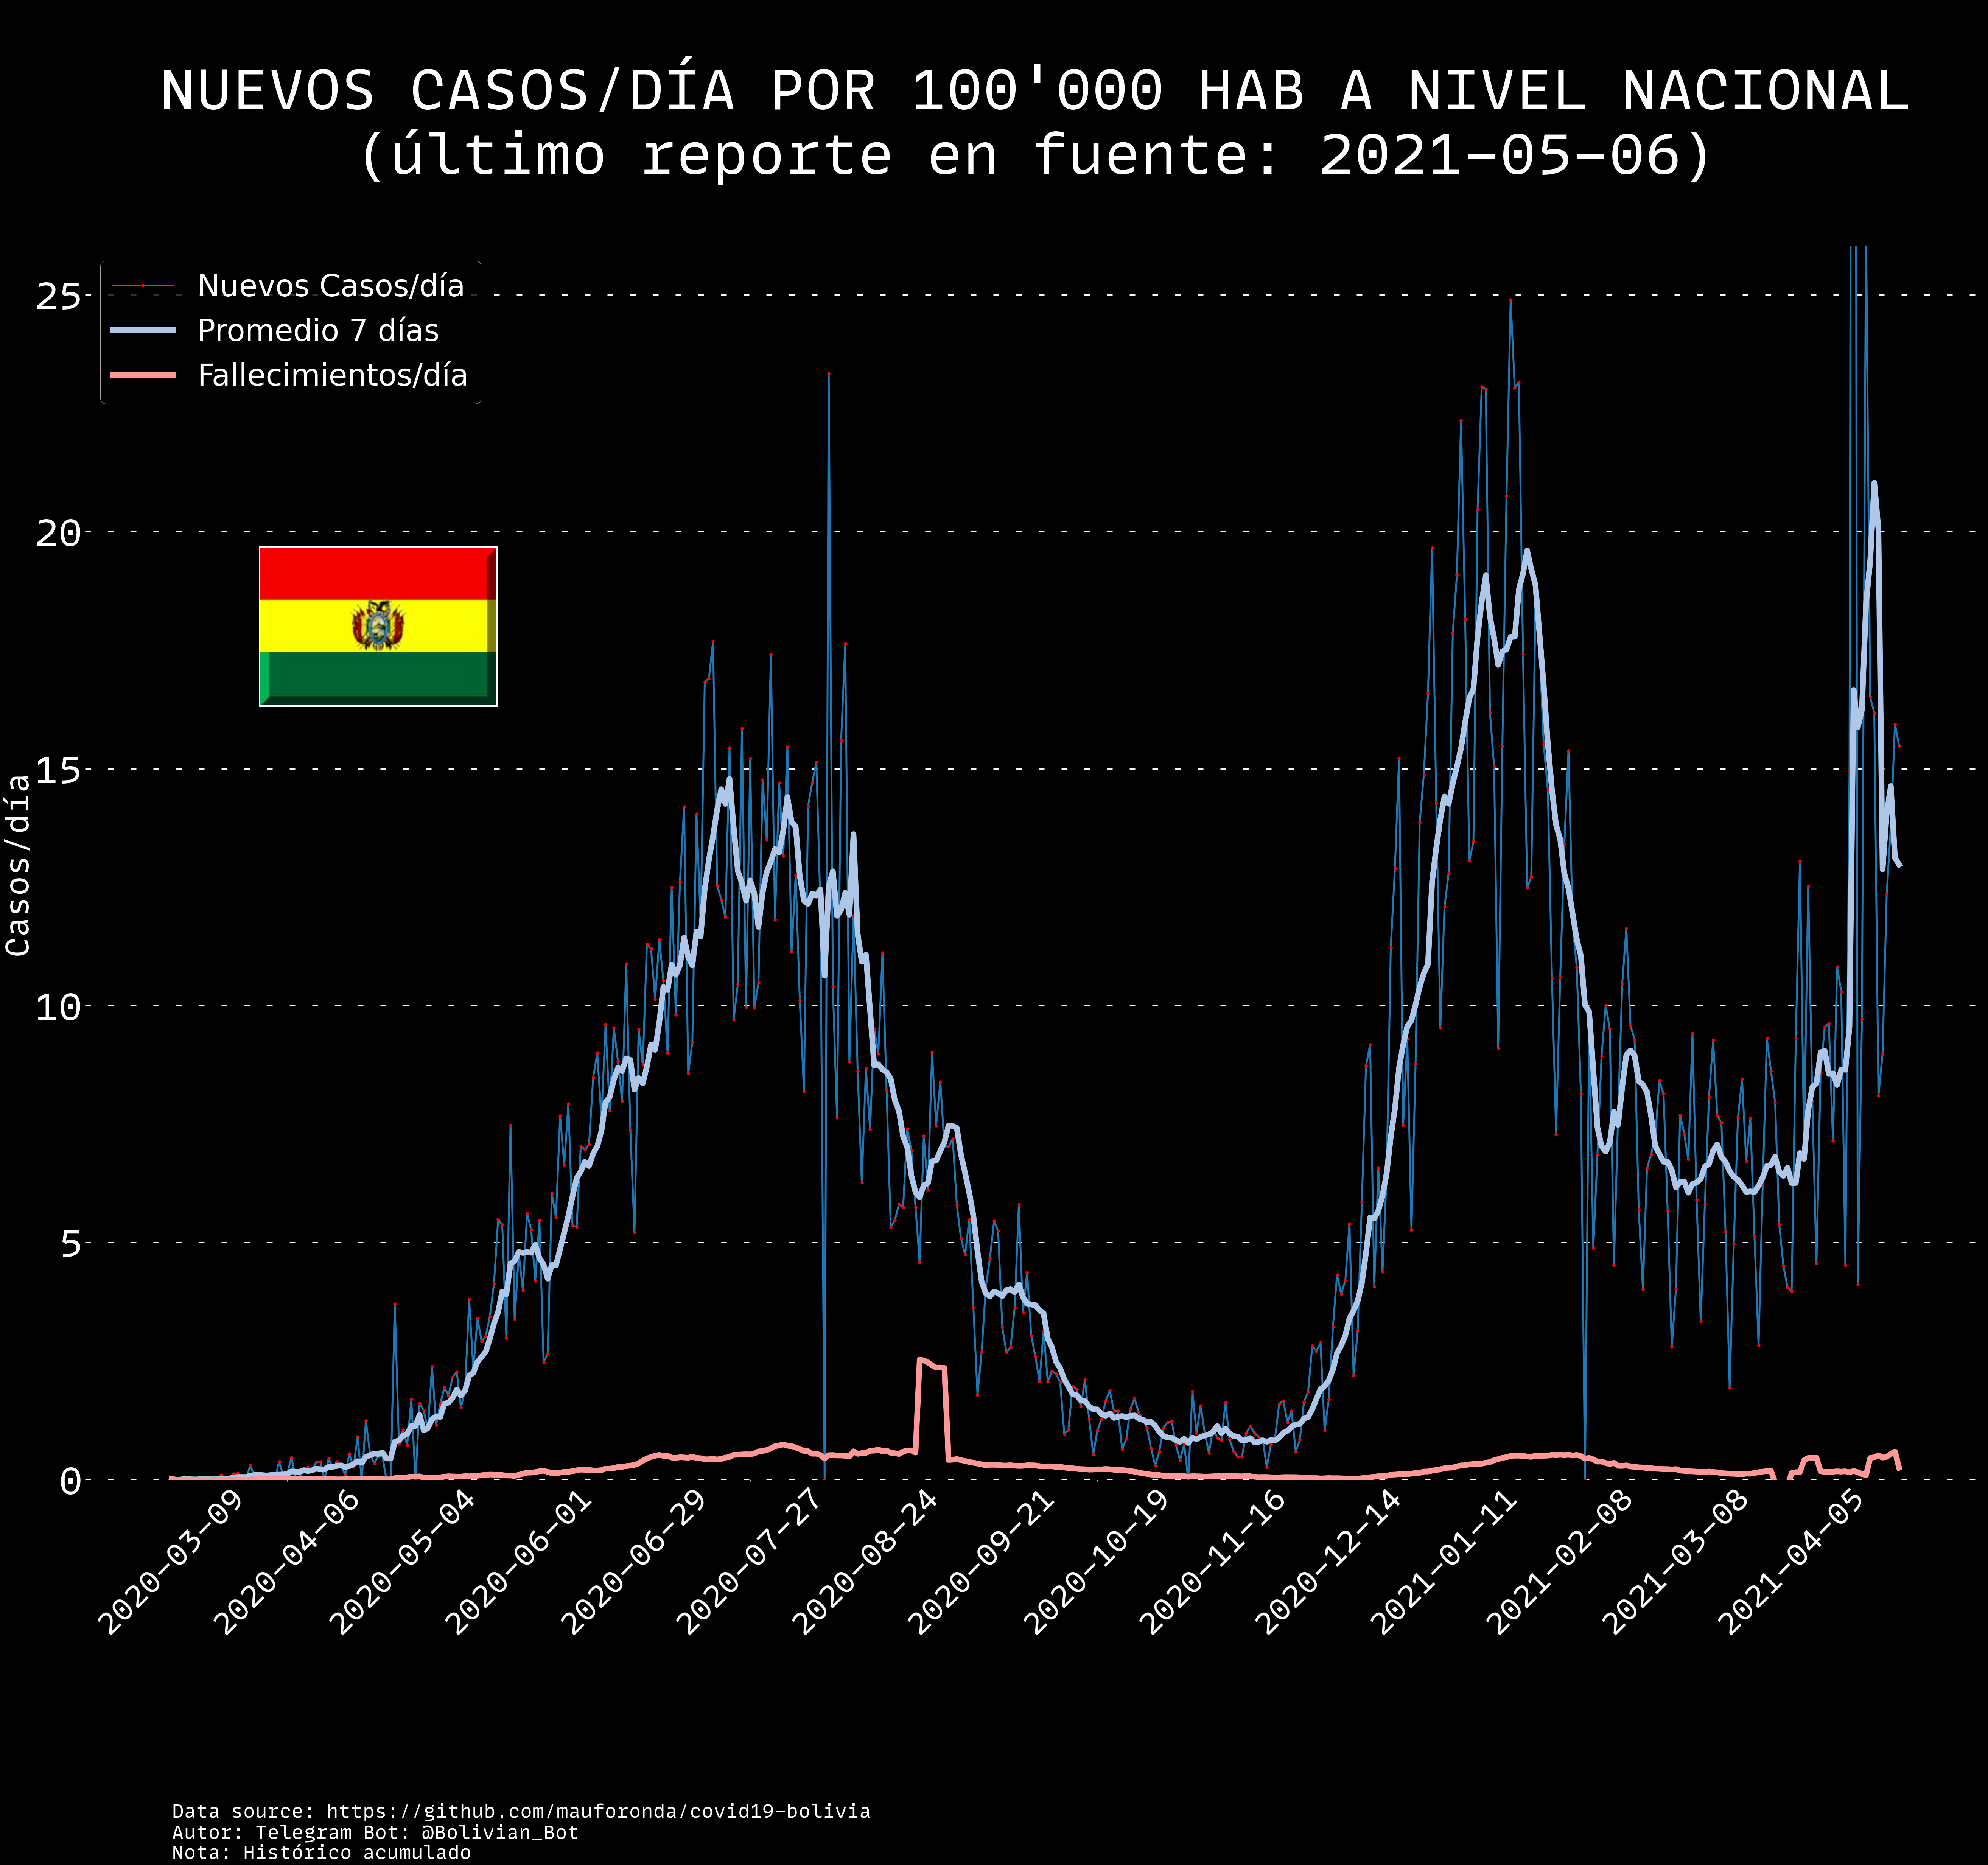

In [32]:
import os,sys
import pandas as pd
import numpy as np
    
import matplotlib.pyplot as plt


_n=115.131 # factor de correción para llevar a 10^5 hab
#datos casos diarios
df3=pd.read_csv('covid19-bolivia/confirmados.csv',sep=',').sort_values(by='Fecha').set_index('Fecha')
df4=pd.read_csv('covid19-bolivia/decesos.csv',sep=',').sort_values(by='Fecha').set_index('Fecha')


#ambas concentraciones de datos tienen distintos etiquetados.
#se replican los ordenes en distintos vectores.
dep_c=['La Paz','Cochabamba','Santa Cruz','Oruro','Potosí','Tarija','Chuquisaca','Beni','Pando']

data3 = (df3.iloc[:,:].values.T)/_n
data4 = (df4.iloc[:,:].values.T)/_n

var_c=np.zeros((9,len(data3[0])))  #creamos una nueva variable 
var_m=np.zeros((9,len(data4[0])))  #iniciada en 0

for j in range(9):
    var_c[j,0]=data3[j,0]  #El primer dato es igual a los nuevos casos
    var_m[j,0]=data4[j,0]  #dando el inicio del acumulado
    for i in range(1,len(data3[0])):
        var_c[j,i]=data3[j,i]-data3[j,i-1]
        var_m[j,i]=data4[j,i]-data4[j,i-1]

y_c=df3.index.values       #con el indice dado por las fechas del reporte

mean_df_c = df3.rolling(7,min_periods=1).mean()
mean_df_m = df4.rolling(7,min_periods=1).mean()


mean_dc = (mean_df_c.iloc[:,:].values.T)/_n  
mean_dm = (mean_df_m.iloc[:,:].values.T)/_n 


var_mc=np.zeros((9,len(mean_dc[0])))
var_mm=np.zeros((9,len(mean_dm[0])))


for j in range(9):
    var_mc[j,0]=mean_dc[j,0]
    var_mm[j,0]=mean_dc[j,0]
    for i in range(1,len(data3[0])):
        var_mc[j,i]=mean_dc[j,i]-mean_dc[j,i-1]
        var_mm[j,i]=mean_dm[j,i]-mean_dm[j,i-1]

plt.style.use('dark_background')

from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
from matplotlib import font_manager as fm, rcParams

fpath = os.path.join(r'MonoLisaSimpson-Regular.ttf')
prop = fm.FontProperties(fname=fpath)
fname = os.path.split(fpath)[1]


bol = mpimg.imread('bol.jpg')
imagebox = OffsetImage(bol,zoom=3)
firma = AnnotationBbox(imagebox,(50,18))

# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)   


nacional1_=var_c[0]+var_c[1]+var_c[2]+var_c[3]+var_c[4]+var_c[5]+var_c[6]+var_c[7]+var_c[8]
nacional2_=var_mc[0]+var_mc[1]+var_mc[2]+var_mc[3]+var_mc[4]+var_mc[5]+var_mc[6]+var_mc[7]+var_mc[8]
nacional3_=var_mm[0]+var_mm[1]+var_mm[2]+var_mm[3]+var_mm[4]+var_mm[5]+var_mm[6]+var_mm[7]+var_mm[8]


plt.figure(figsize=(90,60))
plt.title('\nNUEVOS CASOS/DÍA POR 100\'000 HAB A NIVEL NACIONAL'+'\n(último reporte en fuente: '+y_c[-1]+')\n',fontsize=150,fontproperties=prop)
plt.plot(y_c,nacional1_,label='Nuevos Casos/día',linewidth=5,color=tableau20[0],linestyle='-',marker='.',markersize=15,markeredgecolor='red',markerfacecolor='r')
plt.plot(y_c,nacional2_,label='Promedio 7 días',linewidth=15,color=tableau20[1],linestyle='-')
plt.plot(y_c,nacional3_,label='Fallecimientos/día',linewidth=15,color=tableau20[7],linestyle='-')
plt.legend(loc='upper left',fontsize=80)
plt.yticks(fontsize=100,fontproperties=prop)
plt.xticks(y_c[::28],fontsize=80,rotation=45,fontproperties=prop)
plt.ylim(0,np.max(nacional2_)+5)  
plt.ylabel('Casos/día',fontsize=85,fontproperties=prop)
plt.gca().yaxis.grid(linestyle='--',linewidth=3,dashes=(5,15))
plt.gca().spines["top"].set_visible(False)    
plt.gca().spines["bottom"].set_visible(True)    
plt.gca().spines["right"].set_visible(False)    
plt.gca().spines["left"].set_visible(False)  
plt.gca().get_xaxis().tick_bottom()    
plt.gca().get_yaxis().tick_left()
plt.gca().add_artist(firma)
plt.text(0,-8,"Data source: https://github.com/mauforonda/covid19-bolivia"    
       "\nAutor: Telegram Bot: @Bolivian_Bot"    
       "\nNota: Histórico acumulado",fontsize=50,fontproperties=prop); 
plt.savefig('pics/covNac.png')

